<a href="https://colab.research.google.com/github/nedamhs/Tweet-Emotion-Recognition/blob/main/Tweet_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition


In [4]:
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.6 MB/s eta 0:00:00


In [5]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nlp
import random
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [7]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

In [9]:
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Load the pickle file
with open(os.getcwd()+ '/drive/My Drive/Tweet Emotion Recognition' + '/emotion_data.pkl', 'rb') as f:
    df = pd.read_pickle(f)

In [13]:
df.info;

In [14]:
df

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
...,...,...
566,that was what i felt when i was finally accept...,joy
36236,i take every day as it comes i m just focussin...,fear
76229,i just suddenly feel that everything was fake,sadness
131640,im feeling more eager than ever to claw back w...,joy


In [15]:
# # Split df into train (80%) and temp (20%)
# train, temp = train_test_split(df, test_size=0.2, random_state=42)

# # Split temp (20%) into validation (10%) and test (10%)
# val, test = train_test_split(temp, test_size=0.5, random_state=42)

# print(f"Train size: {len(train)} ")
# print(f"Validation size: {len(val)} ")
# print(f"Test size: {len(test)} ")

In [16]:
# def get_tweets(data):
#     texts = data['text'].tolist()
#     labels = data['emotions'].tolist()
#     return texts, labels

In [17]:
# Features
X = df['text'].tolist()
# Target labels
y = df['emotions'].tolist()

X_train, X_temp, y_train, y_temp  = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


X_val, X_test, y_val, y_test  = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, shuffle=True)


print(f"Train size: {len(X_train)} ")
print(f"Validation size: {len(X_val)} ")
print(f"Test size: {len(X_test)} ")

Train size: 333447 
Validation size: 41681 
Test size: 41681 


In [18]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')

tokenizer.fit_on_texts(X_train)

print(tokenizer.texts_to_sequences([X_train[0]]))

[[17, 1137, 50, 1668, 241, 4, 924, 114, 37, 33, 2, 21, 214, 1550, 28, 50, 21, 311, 16, 132, 203, 13, 21, 40, 6638, 16, 19, 5, 55, 110, 1571, 59, 62, 179, 8, 566, 59, 68, 539, 35, 6, 115]]


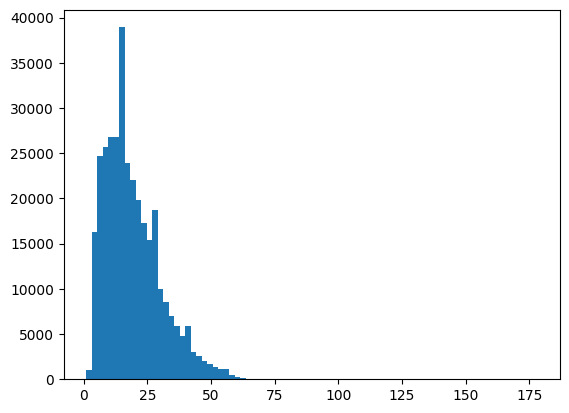

In [19]:
# length of the tweets
lengths = [len(t.split(' ')) for t in X_train]

plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
def get_sequences(tokenizer, X_train):
    sequences = tokenizer.texts_to_sequences(X_train)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [22]:
padded_train_sequences = get_sequences(tokenizer, X_train)

In [23]:
padded_train_sequences[0]

array([  17, 1137,   50, 1668,  241,    4,  924,  114,   37,   33,    2,
         21,  214, 1550,   28,   50,   21,  311,   16,  132,  203,   13,
         21,   40, 6638,   16,   19,    5,   55,  110, 1571,   59,   62,
        179,    8,  566,   59,   68,  539,   35,    6,  115,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [24]:
classes = set(y_train)
print(classes)

{'surprise', 'love', 'fear', 'anger', 'joy', 'sadness'}


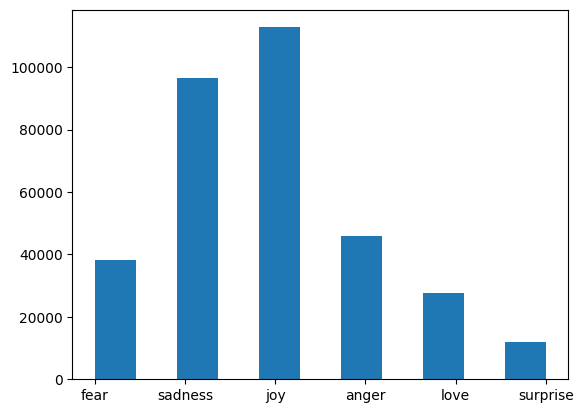

In [25]:
plt.hist(y_train, bins=11)
plt.show()

In [26]:
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [27]:
print(classes_to_index)
print(index_to_classes)

{'surprise': 0, 'love': 1, 'fear': 2, 'anger': 3, 'joy': 4, 'sadness': 5}
{0: 'surprise', 1: 'love', 2: 'fear', 3: 'anger', 4: 'joy', 5: 'sadness'}


In [28]:
#Converting text labels to numeric labels
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [29]:
train_labels = names_to_ids(y_train)
print(train_labels[0])

2


## Model


In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

##  Training the Model


In [31]:
val_sequences = get_sequences(tokenizer, X_val)
val_labels = names_to_ids(y_val)


print(len(X_val))
print(len(y_val))

print(len(val_sequences))
print(len(val_labels))

41681
41681
41681
41681


In [32]:
X_val[0], y_val[0]

('im feelin a bit rebellious so im going to go on a roswell marathon right now',
 'anger')

In [33]:
h = model.fit(
    padded_train_sequences, train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)
    ]
)

print("done")

Epoch 1/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 161s 15ms/step - accuracy: 0.7760 - loss: 0.5886 - val_accuracy: 0.9351 - val_loss: 0.1226
Epoch 2/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 199s 15ms/step - accuracy: 0.9360 - loss: 0.1135 - val_accuracy: 0.9374 - val_loss: 0.1009
Epoch 3/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 210s 16ms/step - accuracy: 0.9396 - loss: 0.0962 - val_accuracy: 0.9380 - val_loss: 0.0952
Epoch 4/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 201s 15ms/step - accuracy: 0.9416 - loss: 0.0910 - val_accuracy: 0.9391 - val_loss: 0.0970
Epoch 5/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 158s 15ms/step - accuracy: 0.9419 - loss: 0.0891 - val_accuracy: 0.9401 - val_loss: 0.0960
Epoch 6/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 199s 15ms/step - accuracy: 0.9429 - loss: 0.0861 - val_accuracy: 0.9369 - val_loss: 0.0930
Epoch 7/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 155s 15ms/step - accuracy: 0.9431 - loss: 0.0846 - val_accuracy: 0.9374 - val_loss: 0.0946
done


## Evaluating the Model


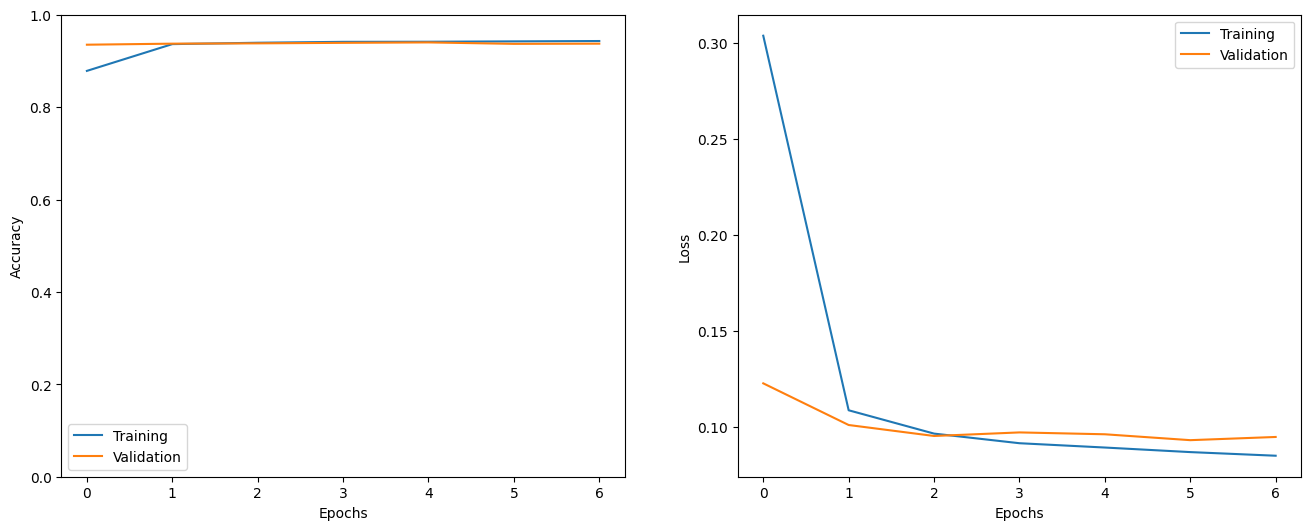

In [34]:
show_history(h)

In [35]:
test_sequences = get_sequences(tokenizer, X_test)
test_labels = names_to_ids(y_test)

In [36]:
_ = model.evaluate(test_sequences, test_labels)

1303/1303 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9364 - loss: 0.0961


In [45]:
i = random.randint(0, len(test_labels) - 1)

print('Sentence:', X_test[i])
print('Emotion:', index_to_classes[test_labels[i]])

#p = model.predict_classes(np.expand_dims(test_sequences[i], axis=0))[0]

p = np.argmax(model.predict(np.expand_dims(test_sequences[i], axis=0)), axis=-1)[0]

print('Predicted Emotion:', index_to_classes.get(p))

Sentence: i have used this saying many times before and i am currently going through a situation now in which i feel this saying is acceptable
Emotion: joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
Predicted Emotion: joy


In [48]:
# preds = model.predict_classes(test_sequences)

# Get predictions (probability distribution for each class)
pred_probs = model.predict(test_sequences)

# Get the class with the highest probability for each test sample
preds = np.argmax(pred_probs, axis=-1)

preds.shape, test_labels.shape

1303/1303 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step


((41681,), (41681,))

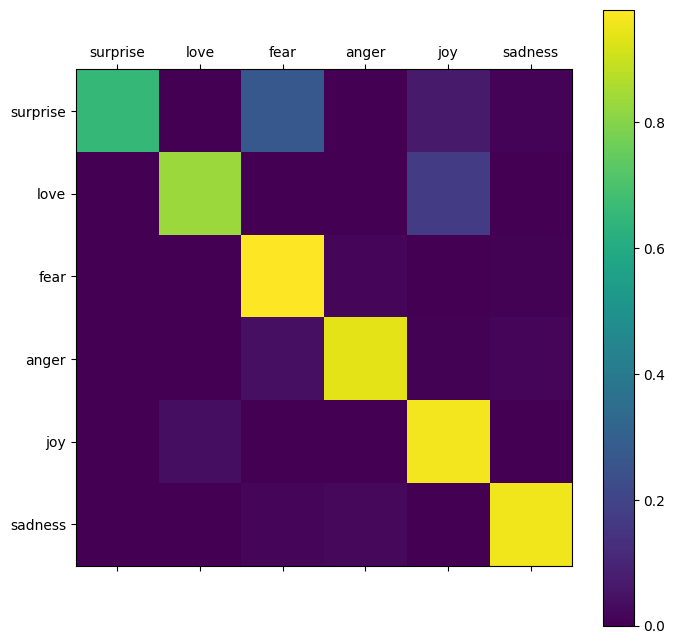

In [49]:
show_confusion_matrix(test_labels, preds, list(classes))